# Подключение библиотек

In [1]:
import numpy as np
import pandas as pd
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# Объявление данных

In [2]:
pd.set_option('display.max_columns', None)
data = pd.read_parquet(r'data11.parquet')
X = data.drop(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'], axis = 1).values
y = data['y'].values

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение модели SVR

In [3]:
# Создание и обучение модели SVR
svr = make_pipeline(StandardScaler(), SVR(C=100, epsilon=0.2, kernel='rbf'))
svr.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(C=100, epsilon=0.2))])

# Оценка модели

In [4]:
print("Score на тестовой выборке: ", svr.score(X_test, y_test))

Score на тестовой выборке:  0.9232988953235957


# Генерируем равномерно распределенные точки для предсказания моделью

In [5]:
X_plot = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_plot = svr.predict(X)

# Визуализируем результат

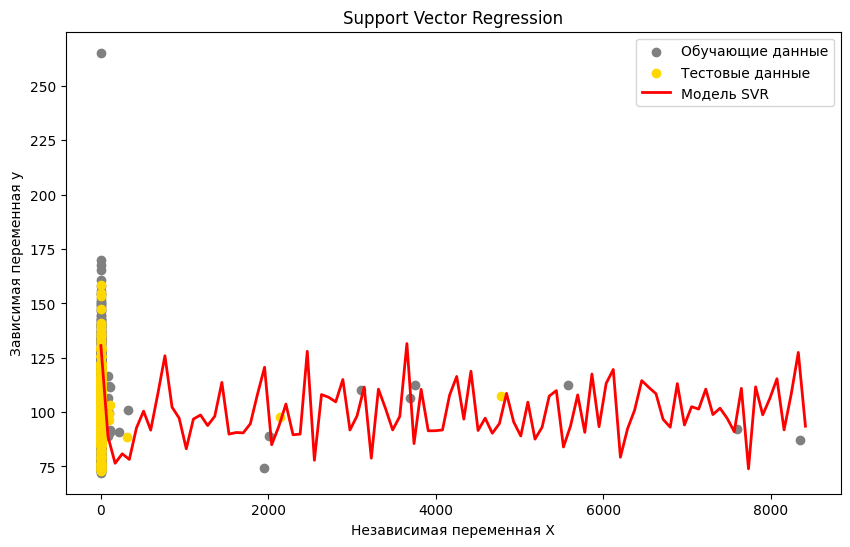

In [6]:
plt.figure(figsize=(10, 6))
# Отображаем обучающие данные
plt.scatter(X_train.reshape(-1, 1)[:3367], y_train.reshape(-1, 1), color='gray', label='Обучающие данные')
# Отображаем тестовые данные
plt.scatter(X_test.reshape(-1, 1)[:842], y_test.reshape(-1, 1), color='gold', label='Тестовые данные')
# Отображаем предсказания модели

plt.plot(X_plot, y_plot.reshape(-1, 1)[:100], color='red', label='Модель SVR', linewidth=2)
plt.xlabel('Независимая переменная X')
plt.ylabel('Зависимая переменная y')
plt.title('Support Vector Regression')
plt.legend()
plt.show()